In [2]:
import sys
sys.path.append('../scripts')

%run envconfig.py

from imports import *
from run import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# dump
dump = "/Volumes/photo"
staging_home = ""
server_home = "/Volumes"
ignore = [".jpg", ".jpeg", ".png"]
replace = False
mode = 'move'
staging = {}
server = {"HOME": server_home,
          "image": f"{server_home}/photo",
          "video": f"{server_home}/video",
          "audio": f"{server_home}/photo",
          "archive": f"{server_home}/documents"}

arguments = Arguments(dump, staging, server, ignore, replace, mode)   

# EXPENSIVE OPERATION: List files
files = ls_recursive(src_dir=arguments.dump, ignore=arguments.ignore)

In [41]:
# Building metadata
video_formats = ['.3gp', '.mp4', '.MP4', '.mov', '.MOV', '.MPG', '.AVI', '.WAV', '.wav']
other_formats = pd.Series([os.path.splitext(f)[1] for f in files if os.path.splitext(f)[1] not in video_formats]).unique()
video_files = list(pd.Series([f for f in files if os.path.splitext(f)[1] in video_formats]))

In [49]:
# Build a table of files metadata
meta = file_metadata(files=video_files)

# Build a migration table
table = migration_table(df=meta, dirs=arguments.server)
print("Plan ready.")

1341 files stats collected...
stats table built...
file types inferred...

177/1154 files duplicated and ignored
977 total files to migrate...

Example of migration table:
st_mtime                                       2019-06-20 21:57:36
st_ctime                                       2019-06-20 21:57:36
st_size                                                    1816590
abspath_src      /Volumes/photo/2016-05-22/VID_20160522_221554.mp4
basename_src                               VID_20160522_221554.mp4
filename_src                                   VID_20160522_221554
extension_src                                                 .mp4
created_at                                     2019-06-20 21:57:36
file_type                                                    video
file_ext                                                      .mp4
basename_dst                               VID_20160522_221554.mp4
parentdir_dst                                       /Volumes/video
dirname_dst             

In [ ]:
execute(df=table, mode=arguments.mode, replace=arguments.replace)

 29%|██▉       | 283/977 [22:06<4:53:26, 25.37s/it]

In [ ]:
plan = plan_migration(src_dir=arguments.dump, arguments=arguments)

In [ ]:
plan

In [ ]:
stage(arguments)

In [ ]:
load(arguments)

## Screenshots

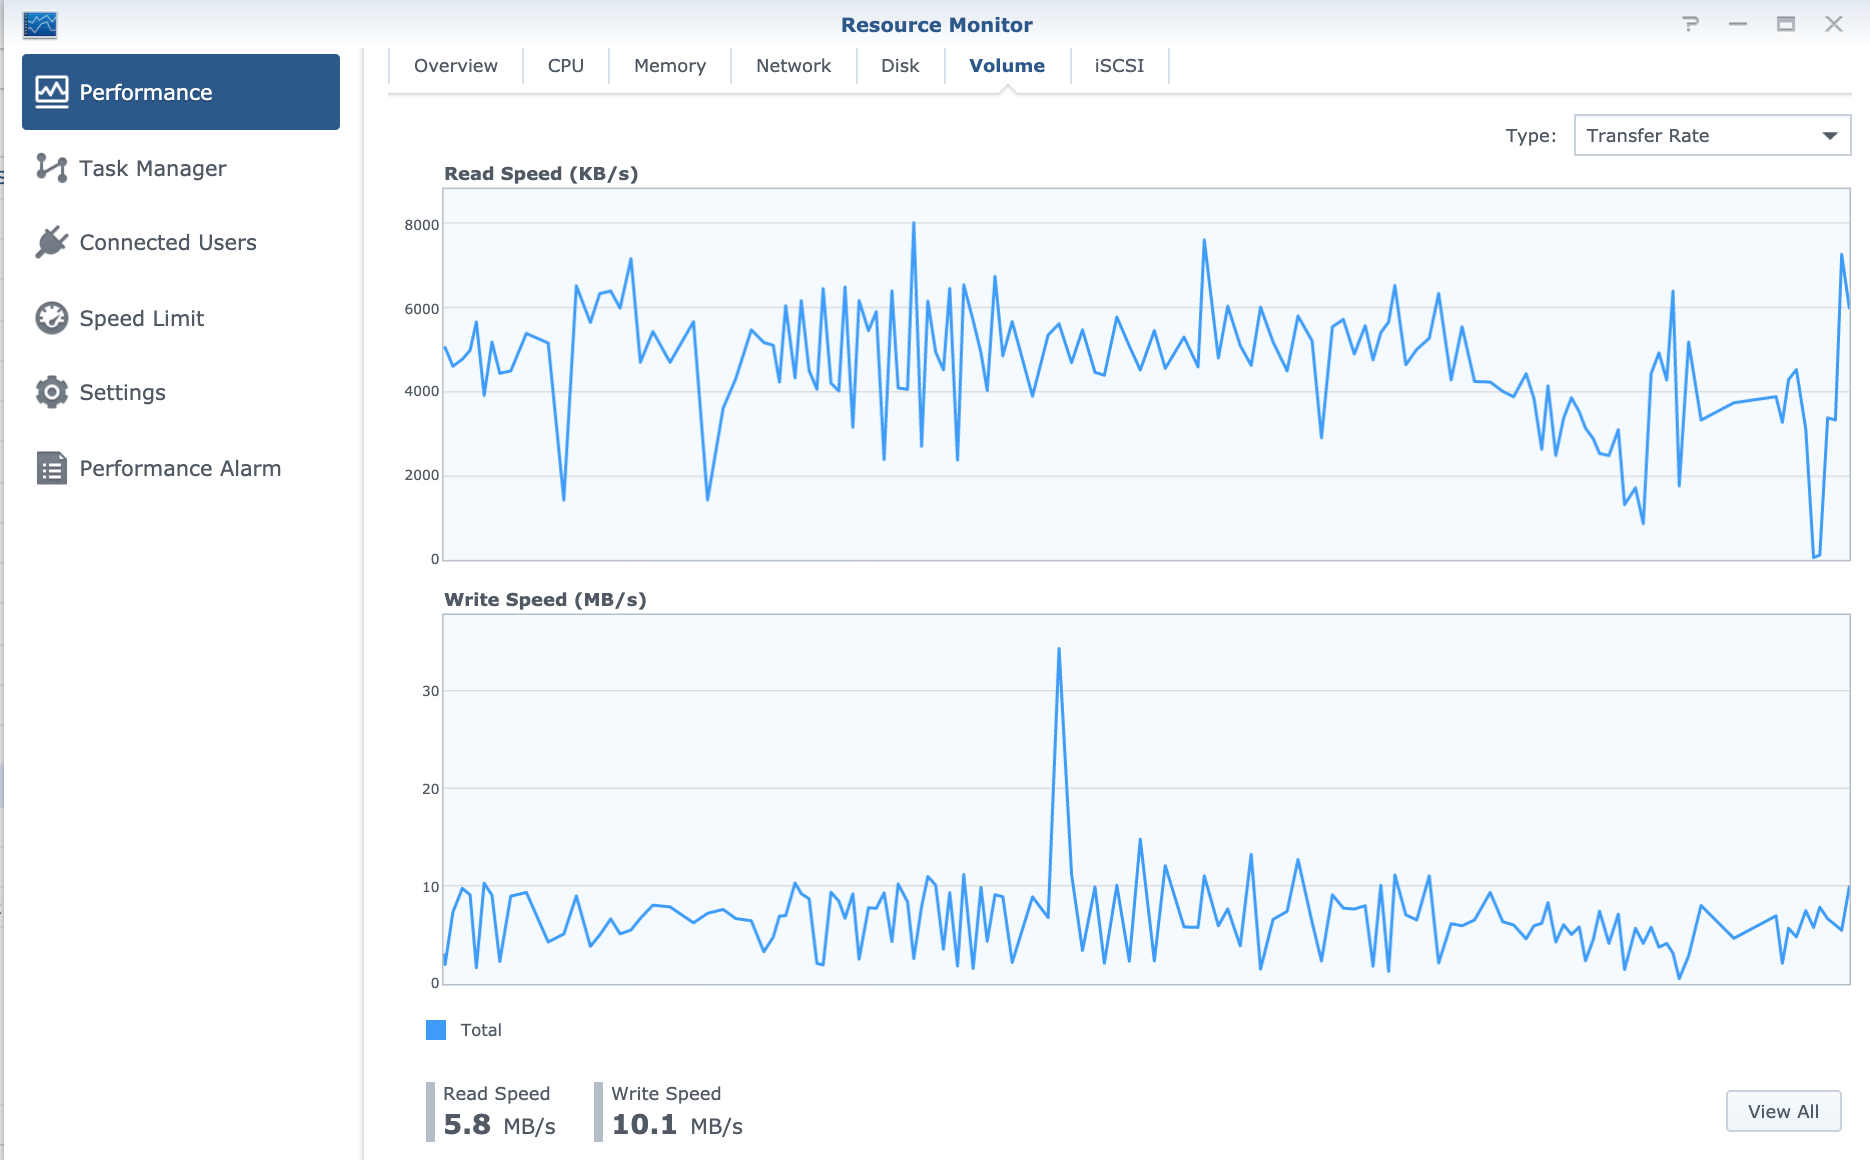

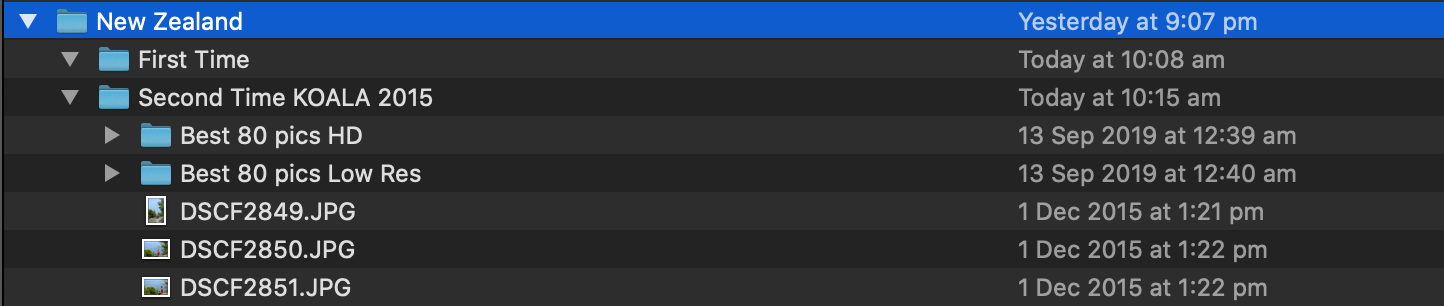

In [ ]:
files = ls_recursive(src_dir="/Volumes/loris_images/Europe")